# MNIST digits

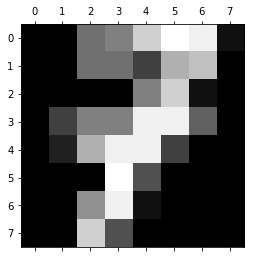

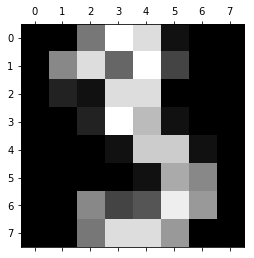

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import *
import matplotlib.pyplot as plt
import numpy as np
    
digits = load_digits()

plt.gray() 
plt.matshow(digits.images[7]), plt.matshow(digits.images[3])
plt.figure(figsize=(20, 4))
plt.show()

In [7]:
# reshape the data for the classifier
# data_for_classifier = digits.images.reshape(len(digits.images), -1)

# split the data: test-train-validate as 30/60/10
# from sklearn.model_selection import train_test_split
trainData, testData, trainLabels, testLabels = model_selection.train_test_split(np.array(digits.data), 
                                                                digits.target, test_size=0.3, random_state=42)
trainData, valData, trainLabels, valLabels = model_selection.train_test_split(trainData, 
                                                              trainLabels, test_size=0.1, random_state=84)

# show the sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1131
validation data points: 126
testing data points: 540


In [8]:
accuracies = []
kVals = range(1, 30, 2)

# loop over 30 possible values of k
for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)
    
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
    
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
    accuracies[i] * 100))

k=1, accuracy=97.62%
k=2, accuracy=97.62%
k=3, accuracy=96.83%
k=4, accuracy=97.62%
k=5, accuracy=97.62%
k=6, accuracy=96.03%
k=7, accuracy=97.62%
k=8, accuracy=97.62%
k=9, accuracy=97.62%
k=10, accuracy=97.62%
k=11, accuracy=96.83%
k=12, accuracy=96.03%
k=13, accuracy=96.83%
k=14, accuracy=96.83%
k=15, accuracy=96.03%
k=16, accuracy=96.03%
k=17, accuracy=95.24%
k=18, accuracy=95.24%
k=19, accuracy=95.24%
k=20, accuracy=94.44%
k=21, accuracy=94.44%
k=22, accuracy=94.44%
k=23, accuracy=94.44%
k=24, accuracy=94.44%
k=25, accuracy=94.44%
k=26, accuracy=93.65%
k=27, accuracy=93.65%
k=28, accuracy=93.65%
k=29, accuracy=94.44%
k=1 achieved highest accuracy of 97.62% on validation data


In [9]:
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
from sklearn.metrics import classification_report
print(classification_report(testLabels, predictions))

EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        53
          1       0.96      1.00      0.98        50
          2       1.00      1.00      1.00        47
          3       0.98      0.98      0.98        54
          4       0.98      0.98      0.98        60
          5       1.00      0.98      0.99        66
          6       1.00      1.00      1.00        53
          7       1.00      0.98      0.99        55
          8       0.98      0.95      0.96        43
          9       0.95      0.97      0.96        59

avg / total       0.99      0.99      0.99       540

